In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mnist_processing import load_mnist, show_img
from xqys.preprocessing import rescalling

In [3]:
data_path = 'D:/Content_2/NN_from_scratch/NeuralNetworks/data/MNIST'

In [4]:
X_train, y_train, X_test, y_test = load_mnist(data_path)

In [5]:
X_train = X_train.T
y_train = y_train.reshape(1, -1)

In [6]:
X_train.shape

(784, 60000)

In [7]:
y_train.shape

(1, 60000)

In [8]:
X_train = rescalling(X_train, 1./255)
X_test = rescalling(X_test, 1./255)

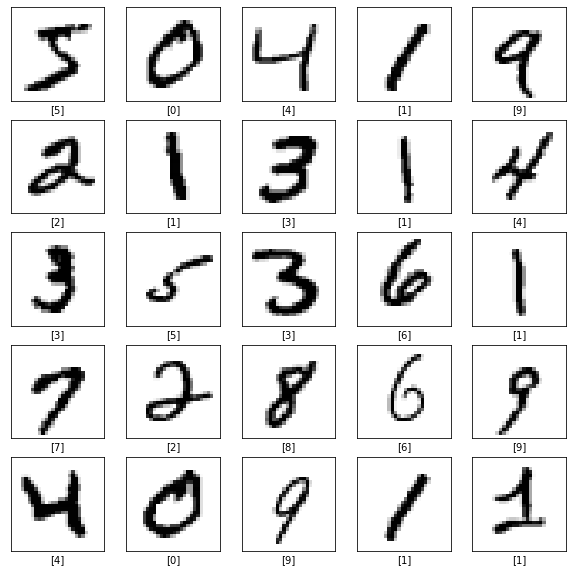

In [10]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[:, i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[:, i])
plt.show()

# Model

In [11]:
from xqys import NeuralNet, initializers, optimizations

In [23]:
model = NeuralNet()

In [24]:
model.add_dense_layer(128, 'relu')
# model.add_dense_layer(128, 'relu', L2_regularization_lambda=0.001)
model.add_dense_layer(10, 'softmax')

In [25]:
initializer = initializers.He()
# initializer = initializers.RandomNormal()

In [26]:
# optimizer = optimizations.GradientDescent(0.1)
optimizer = optimizations.Adam(0.001)

In [27]:
model.compile(optimizer, initializer, 'categorical-cross-entropy', 'accuracy')

In [28]:
from datetime import datetime

In [29]:
start = datetime.now()
model.fit(X_train, y_train, 128, 10, shuffle=False, print_each_n=1)
end = datetime.now()
diff = (end - start).total_seconds() / 60
print('training took', diff, 'mins')

Epoch 1/10 cost of 0.37768069417656447
Epoch 2/10 cost of 0.1803670853655469
Epoch 3/10 cost of 0.1310197944278202
Epoch 4/10 cost of 0.10238501863363404
Epoch 5/10 cost of 0.08301829040464004
Epoch 6/10 cost of 0.0687877774830373
Epoch 7/10 cost of 0.057785162034327854
Epoch 8/10 cost of 0.04870973928983765
Epoch 9/10 cost of 0.041432058503718845
Epoch 10/10 cost of 0.03501116410497007
training took 0.4356848333333333 mins


In [30]:
print(model.evaluate(X_train, y_train))

(0.03216022770873927, 0.9907666666666667)


In [34]:
X_test = X_test.T
y_test = y_test.reshape(1, -1)

In [35]:
X_test.shape

(784, 10000)

In [36]:
print(model.evaluate(X_test, y_test))

(0.08419864229320576, 0.9742)


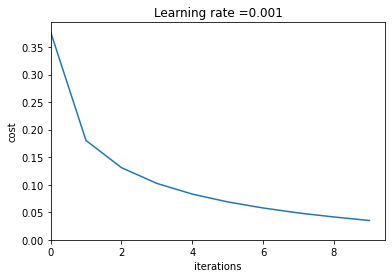

In [37]:
model.plot_cost()

In [38]:
model.save('mnist_model.pkl')

# Load the model

In [40]:
from xqys.neural_network import load_model
loaded_model = load_model('mnist_model.pkl')

# Predictions

In [41]:
loaded_model.predict(X_test[:, 1])

array([[2]], dtype=int64)

In [42]:
predictions = loaded_model.predict(X_test)

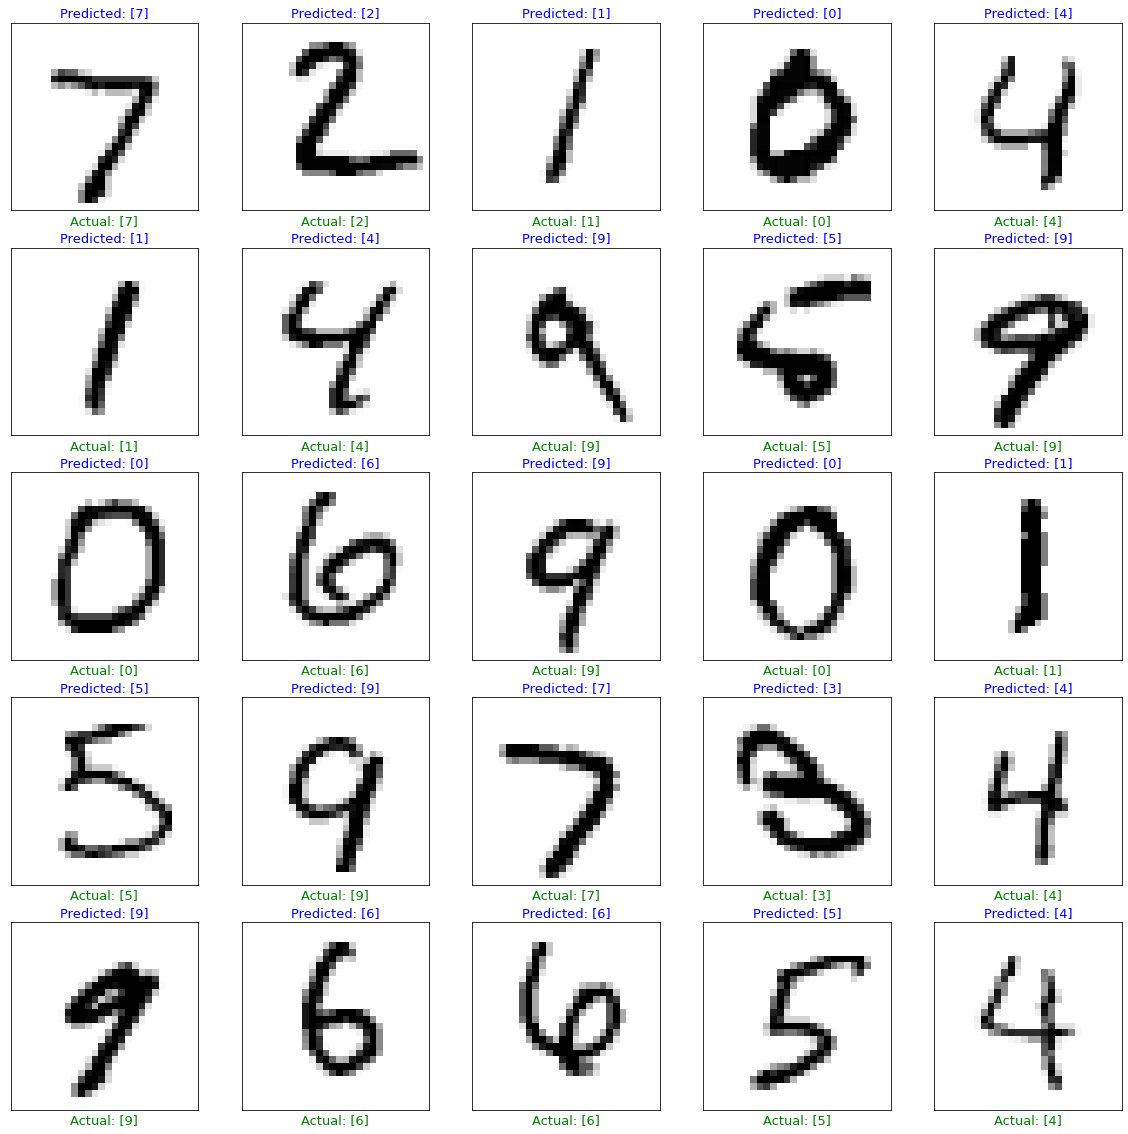

In [43]:
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, 1+i)
    plt.imshow(X_test[:, i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f'Actual: {y_test[:, i]}', fontsize=13, color='green')
    color = 'blue' if y_test[:, i] == predictions[:, i] else 'red'
    plt.title(f'Predicted: {predictions[:, i]}', fontsize=13, color=color)
plt.show()